In [1]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron 

In [2]:
def plot3d_data_and_decision_function(X, y, W, b):
    ax = plt.axes(projection='3d')
    # create x,y
    xx, yy = np.meshgrid(range(10), range(10))
    # calculate corresponding z
    # [x, y, z] * [W[0], W[1], W[2]] + b = 0
    zz = (-W[0] * xx - W[1] * yy - b) / W[2]
    ax.plot_surface(xx, yy, zz, alpha=0.5)
    ax.scatter3D(X[y == -1, 0], X[y == -1, 1], X[y == -1, 2], 'b');
    ax.scatter3D(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], 'r');
    plt.show()

In [5]:
# incarcarea datelor de antrenare
X = np.loadtxt('data/3d-points/x_train.txt')
y = np.loadtxt('data/3d-points/y_train.txt') 

# incarcarea datelor de testare
X_test = np.loadtxt('data/3d-points/x_test.txt')
y_test = np.loadtxt('data/3d-points/y_test.txt') 

In [6]:
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print("Accuratete pe antrenare: {}".format(train_acc))
    print("Accuratete pe testare: {}".format(test_acc))
    print("Ponderile: {}".format(model.coef_))
    print("Bias: {}".format(model.intercept_))
    print("Numarul de iteratii: {}".format(model.n_iter_))

In [8]:
perceptron_model = Perceptron(eta0=0.1, tol=1e-5)
train_model(perceptron_model, X, X_test, y, y_test)

Accuratete pe antrenare: 0.881
Accuratete pe testare: 0.905
Ponderile: [[-1.64921166 -1.84272361 -1.97507964]]
Bias: [21.2]
Numarul de iteratii: 11


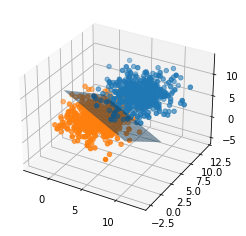

In [11]:
plot3d_data_and_decision_function(X, y, np.squeeze(perceptron_model.coef_), perceptron_model.intercept_)